## Problem 2

<p>
    The most straightforward way to convert a bivariate normal with correlation to an uncorrelated standard bivariate normal is through something called a cholesky decomposition (https://blogs.sas.com/content/iml/2012/02/08/use-the-cholesky-transformation-to-correlate-and-uncorrelate-variables.html). Luckily numpy has this command built in. We decomposed the covariance matrix, then applied a change of basis. Our data was converted in this way to standard normal, allowing the outlier to be seen much clearer.
</p>

In [15]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [16]:
# Load data
file_path = 'DF2'
df = pd.read_csv(file_path)
#print(np.std(df.iloc[:,1]))
#print(np.std(df.iloc[:,2]))

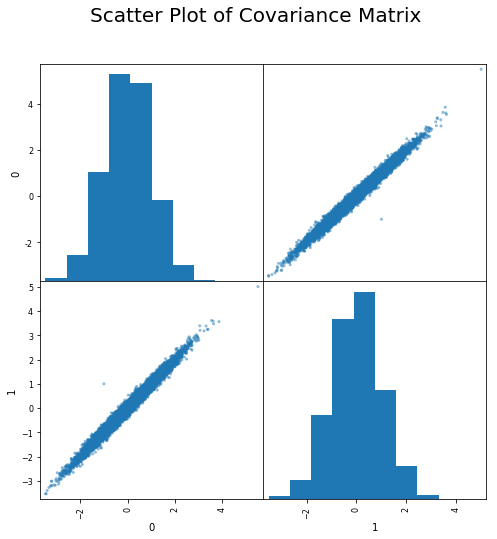

In [17]:
_ = scatter_matrix(df.iloc[:,1:], figsize=(8,8))
_ = plt.suptitle('Scatter Plot of Covariance Matrix', FontSize=20)

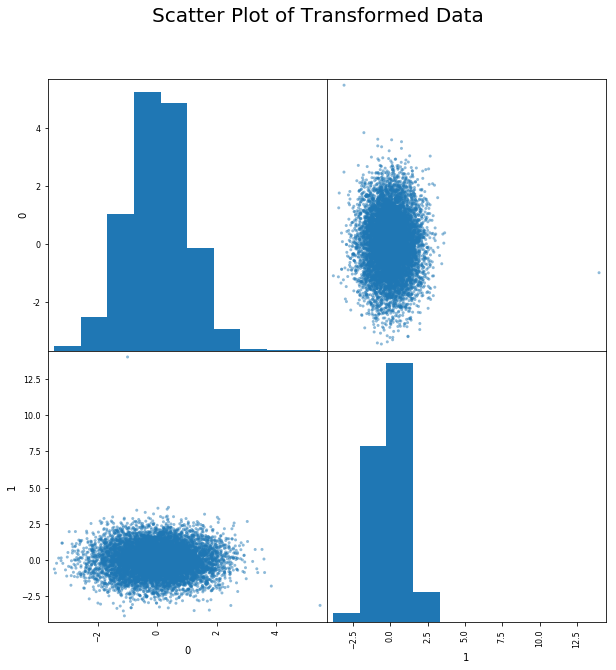

In [18]:
Z = np.array(df.iloc[:,1:])
Q = np.linalg.cholesky(df.iloc[:,1:].cov())
Q_inv = np.linalg.inv(Q.T)
Y = np.dot(Z, Q_inv)
Y = pd.DataFrame(Y)
_ = scatter_matrix(Y, figsize=(10,10))
_ = plt.suptitle('Scatter Plot of Transformed Data', FontSize=20)

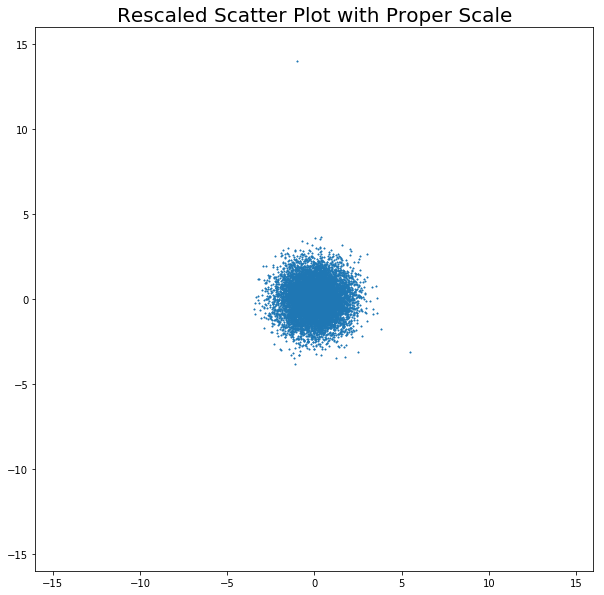

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(Y.iloc[:,0], Y.iloc[:,1], s=1.5, marker='*')
_ = plt.xlim([-16,16])
_ = plt.ylim([-16,16])
_ = plt.title('Rescaled Scatter Plot with Proper Scale', FontSize=20)